## Tutorial notebook on how to use the CLMS Data Store and its preload_data method

### Setup
In order to run this notebook, you need to install [`xcube_clms`](https://github.com/xcube-dev/xcube-clms). You can install it following the steps below:

```bash
conda env create -f environment.yml
conda activate xcube-clms
pip install .
```

Note that [`xcube_clms`](https://github.com/xcube-dev/xcube-clms) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

You also need the credentials from the Land Monitoring service. Please follows the steps outlined [`here`](https://eea.github.io/clms-api-docs/authentication.html) to download your credentials and place them in the same directory as this notebook.

In [1]:
%%time
import json

from xcube.core.store import new_data_store

CPU times: user 2.59 s, sys: 402 ms, total: 3 s
Wall time: 2.17 s


To get the credentials.json, please follow the steps outlined [here](https://eea.github.io/clms-api-docs/authentication.html)

In [2]:
%%time
json_file_path = "credentials.json"
with open(json_file_path, 'r') as j:
     credentials = json.loads(j.read())

CPU times: user 1.43 ms, sys: 78 μs, total: 1.51 ms
Wall time: 894 μs


When the user creates a new CLMS data store, it already sends requests to the CLMS API to get the catalog information which takes around 15-20 seconds. If no path is provided for the cache location, it will create a `clms_cache/` in the current directory to store all the downloaded data and initialize a local file store

In [3]:
%%time
clms_data_store = new_data_store("clms", credentials=credentials)

CPU times: user 197 ms, sys: 75.3 ms, total: 272 ms
Wall time: 15.6 s


The `Cache Store` within the CLMS data store is another data store which can be any user-defined data store. It defaults to the `file` store. Use `cache_id` and `cache_params` to provide information about the data store you would like to use for caching the preloaded data 

In [4]:
%%time
clms_data_store.cache_store.list_data_ids()

CPU times: user 1.47 ms, sys: 286 μs, total: 1.75 ms
Wall time: 2.06 ms


['forest-type-2018|FTY_2018_010m_fr_03035_v010/forest-type-2018|FTY_2018_010m_fr_03035_v010.zarr',
 'tree-cover-density-2018|TCD_2018_010m_fr_03035_v020/tree-cover-density-2018|TCD_2018_010m_fr_03035_v020.zarr',
 'dominant-leaf-type-2018|DLT_2018_010m_fr_03035_v020/dominant-leaf-type-2018|DLT_2018_010m_fr_03035_v020.zarr']

In [5]:
%%time
clms_data_store.cache_store.root

CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 7.39 μs


'/home/yogesh/Projects/BC/xcube-clms/examples/notebooks/clms_cache'

In [6]:
%%time
clms_data_store.get_data_store_params_schema()

CPU times: user 32 μs, sys: 7 μs, total: 39 μs
Wall time: 40.8 μs


With the following commands, the users can see how the data_ids look like for the CLMS store. Due to the nature of the API, we came up with the computed data_id that combines the product_id and item_id along with the `|` separator. But as a user, you dont have to worry about how it is created, but just that you need to use the complete data_id for interacting with any of the methods of this store

In [7]:
%%time
clms_data_store.list_data_ids()

CPU times: user 1.1 ms, sys: 1.02 ms, total: 2.13 ms
Wall time: 2.13 ms


['clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
 'clc-backbone-2018|CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1',
 'season-maximum-value-2023-raster-300m-global-yearly-version-1|(SEASON 1) c_gls_LSP300-MAXV-S1_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'season-maximum-value-2023-raster-300m-global-yearly-version-1|(SEASON 2) c_gls_LSP300-MAXV-S2_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-up-period-2023-raster-300m-global-yearly-version-1|(SEASON 1) c_gls_LSP300-LSLOPE-S1_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-up-period-2023-raster-300m-global-yearly-version-1|(SEASON 2) c_gls_LSP300-LSLOPE-S2_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-down-period-2023-raster-300m-global-yearly-version-1|(SEASON 1) c_gls_LSP300-RSLOPE-S1_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'slope_of_green-down-period-2023-raster-300m-global-yearly-version-1|(SEASON 2) c_gls_LSP300-RSLOPE-S2_202301010000_GLOBE_OLCI_V1.0.1.tiff',
 'start-of-season-value-2023-raster-300m-global-yearly-

In [8]:
%%time
clms_data_store.get_data_opener_ids()

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 6.2 μs


('dataset:zarr:file',)

In [9]:
%%time
clms_data_store.get_data_types()

CPU times: user 6 μs, sys: 1e+03 ns, total: 7 μs
Wall time: 10 μs


('dataset',)

In [10]:
%%time
clms_data_store.get_preload_data_params_schema()

CPU times: user 23 μs, sys: 5 μs, total: 28 μs
Wall time: 30.3 μs


In [11]:
%%time
clms_data_store.has_data('tree-cover-density-2018|TCD_2018_010m_fr_03035_v020')

CPU times: user 84 μs, sys: 16 μs, total: 100 μs
Wall time: 103 μs


True

In [12]:
%%time
dataset_to_preload = (
    'forest-type-2018|FTY_2018_010m_fr_03035_v010',
    'tree-cover-density-2018|TCD_2018_010m_fr_03035_v020',
    'dominant-leaf-type-2018|DLT_2018_010m_fr_03035_v020',
)

CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 7.39 μs


When the user runs the `preload_data` method, the user can view its status using table provided via the returned `PreloadHandle`, which indicate the status of the download request along with its progress, messages and exceptions, if any. It can be run in both blocking and non-blocking way. The user can silent the progress using the silent flag.

In [13]:
%%time
handle = clms_data_store.preload_data(
    *dataset_to_preload,
    blocking=True, # Defaults to True
    cleanup=True, # Defaults to True,
    silent=False # Defaults to False
)

CPU times: user 89.4 ms, sys: 7.1 ms, total: 96.5 ms
Wall time: 347 ms


In [14]:
%%time
handle.show()

CPU times: user 1.8 ms, sys: 155 μs, total: 1.96 ms
Wall time: 1.41 ms


Now that the preload is completed, the user can open the data using open_data as usual which uses the file data store underneath at the cache location

In [15]:
%%time
clms_data_store.cache_store.list_data_ids()

CPU times: user 0 ns, sys: 1.8 ms, total: 1.8 ms
Wall time: 1.02 ms


['forest-type-2018|FTY_2018_010m_fr_03035_v010/forest-type-2018|FTY_2018_010m_fr_03035_v010.zarr',
 'tree-cover-density-2018|TCD_2018_010m_fr_03035_v020/tree-cover-density-2018|TCD_2018_010m_fr_03035_v020.zarr',
 'dominant-leaf-type-2018|DLT_2018_010m_fr_03035_v020/dominant-leaf-type-2018|DLT_2018_010m_fr_03035_v020.zarr']

In [16]:
clms_data_store.get_open_data_params_schema()

In [17]:
clms_data_store.get_open_data_params_schema('forest-type-2018|FTY_2018_010m_fr_03035_v010/forest-type-2018|FTY_2018_010m_fr_03035_v010.zarr')

In [18]:
%%time
fty = clms_data_store.open_data('forest-type-2018|FTY_2018_010m_fr_03035_v010/forest-type-2018|FTY_2018_010m_fr_03035_v010.zarr')
fty

CPU times: user 28.8 ms, sys: 12.8 ms, total: 41.6 ms
Wall time: 42.4 ms


<xarray.Dataset> Size: 106GB
Dimensions:                      (y: 120000, x: 110000)
Coordinates:
  * x                            (x) float64 880kB 3.2e+06 3.2e+06 ... 4.3e+06
  * y                            (y) float64 960kB 2e+06 2e+06 ... 3.2e+06
Data variables:
    FTY_2018_010m_fr_03035_v010  (y, x) float64 106GB dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    spatial_ref                  int64 8B ...
Attributes:
    AREA_OR_POINT:  Area
    DataType:       Thematic

In [19]:
%%time
tcd = clms_data_store.open_data('tree-cover-density-2018|TCD_2018_010m_fr_03035_v020/tree-cover-density-2018|TCD_2018_010m_fr_03035_v020.zarr')
tcd

CPU times: user 6.43 ms, sys: 2.89 ms, total: 9.32 ms
Wall time: 9.1 ms


<xarray.Dataset> Size: 106GB
Dimensions:                      (y: 120000, x: 110000)
Coordinates:
  * x                            (x) float64 880kB 3.2e+06 3.2e+06 ... 4.3e+06
  * y                            (y) float64 960kB 2e+06 2e+06 ... 3.2e+06
Data variables:
    TCD_2018_010m_fr_03035_v020  (y, x) float64 106GB dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    spatial_ref                  int64 8B ...
Attributes:
    AREA_OR_POINT:  Area
    DataType:       Thematic

CPU times: user 8min 52s, sys: 1min 35s, total: 10min 28s
Wall time: 1min 3s


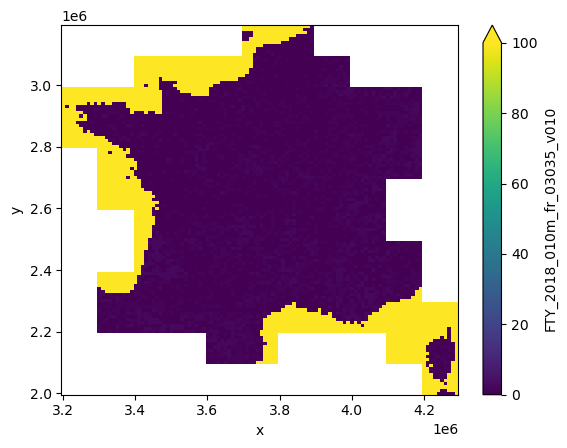

In [23]:
%%time
downsampled_cube = fty.isel(
    x=slice(None, None, 1000),  
    y=slice(None, None, 1000),
)
downsampled_cube.FTY_2018_010m_fr_03035_v010.plot(vmin=0, vmax=100)

CPU times: user 10min 8s, sys: 2min 2s, total: 12min 10s
Wall time: 59.6 s


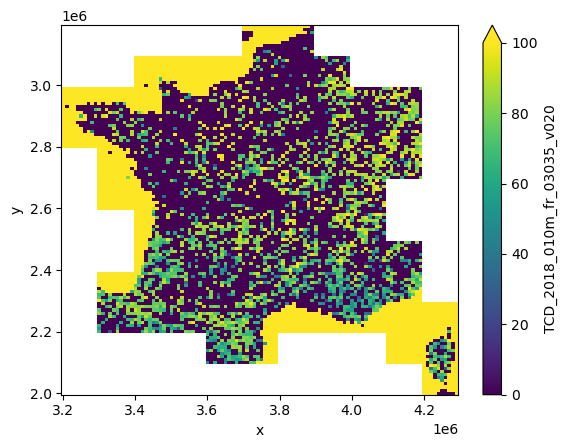

In [24]:
%%time
downsampled_cube = tcd.isel(
    x=slice(None, None, 1000),  
    y=slice(None, None, 1000),
)
downsampled_cube.TCD_2018_010m_fr_03035_v020.plot(vmin=0, vmax=100)